In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import collections

0.47377830750893923
0.49106078665077474
1.317893442436964
1.2464905515472995
0.2926102502979738
0.23480333730631706


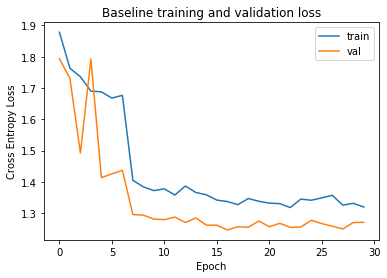

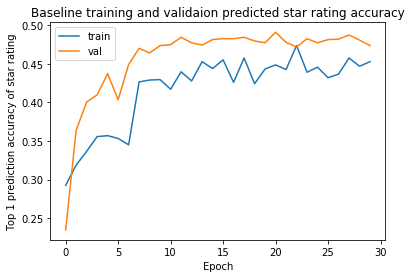

In [14]:
train_loss = np.load('training_results/base_2020_05_20_08_26_menu_train_loss.npy')
val_loss = np.load('training_results/base_2020_05_20_08_26_menu_val_loss.npy')

train_accs = np.load('training_results/base_2020_05_20_08_26_menu_train_accs.npy')
val_accs = np.load('training_results/base_2020_05_20_08_26_menu_val_accs.npy')

# train_loss = train_loss[:20]
# val_loss = val_loss[:20]
# train_accs = train_accs[:20]
# val_accs = val_accs[:20]

fig = plt.figure()
plt.plot([i for i in range(len(train_loss))], train_loss, label="train")
#fig.savefig("loss_and_accuracy/baseline_training_loss.png")
plt.plot([i for i in range(len(train_loss))], val_loss, label="val")
plt.title("Baseline training and validation loss")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.legend()
fig.savefig("loss_and_accuracy/baseline_train_and_val_loss.png")

fig = plt.figure()
plt.plot([i for i in range(len(train_loss))], train_accs, label="train")
#fig.savefig("loss_and_accuracy/baseline_training_acc.png")
plt.plot([i for i in range(len(train_loss))], val_accs, label="val")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Top 1 prediction accuracy of star rating")
plt.title("Baseline training and validaion predicted star rating accuracy")
fig.savefig("loss_and_accuracy/baseline_train_and_val_acc.png")

print(max(train_accs))
print(max(val_accs))

print(min(train_loss))
print(min(val_loss))

print(min(train_accs))
print(min(val_accs))

In [31]:
# histograms of star ratings
# data/photos.json
# data/yelp_academic_dataset_business.json
bus_path = 'data/yelp_academic_dataset_business.json'
photo_path = 'data/photos.json'

f = open(photo_path, 'r')
lines = f.readlines()
labels2bids = collections.defaultdict(list)
for line in lines:
    data = json.loads(line) 
    labels2bids[data['label']].append(data['business_id'])
    
bids2stars = {}
f = open(bus_path, 'r')
lines = f.readlines()
for line in lines:
    data = json.loads(line)
    bids2stars[data['business_id']] = data['stars']
    


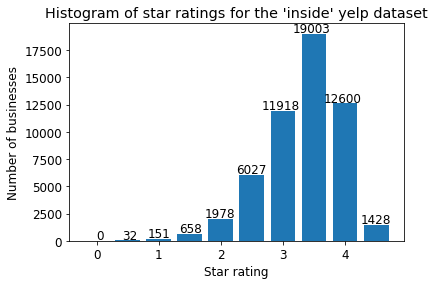

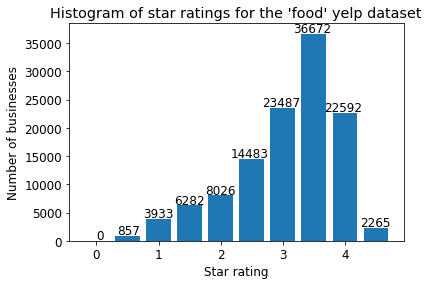

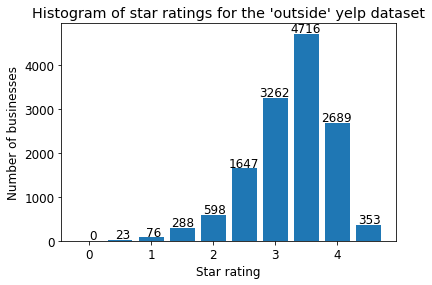

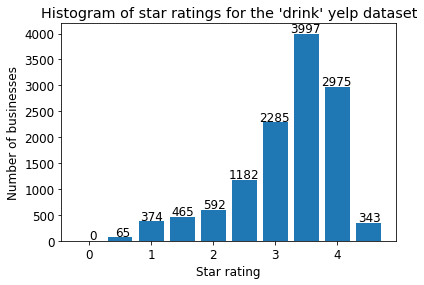

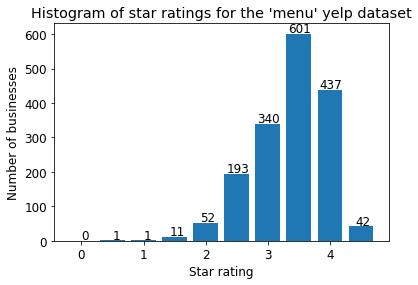

In [32]:
font = {'family' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

for label in labels2bids:
    stars = [0] * 10
    for b_id in labels2bids[label]:
        stars[int(2 * bids2stars[b_id]) - 1] += 1
        
    fig, ax = plt.subplots(figsize=(6,4))
    bar = plt.bar([x / 2 for x in range(10)], stars, width=.4)
    plt.title("Histogram of star ratings for the '{}' yelp dataset".format(label))
    plt.xlabel("Star rating")
    plt.ylabel("Number of businesses")
    
    for i, v in enumerate(stars):
        top = max(stars)
        h = v / top * 25000
        left_adjust = len(str(v)) - 1
        ax.text(i / 2 - (.085 * left_adjust), v + .008 * top, str(v), color='black')#    
        
    plt.savefig('star_histograms/{}.png'.format(label))